### CS 180 Group Project Presentation: Zachary Nabong, Roberto Santos and Shane So

Project Topic:  Predicting the effectiveness of the registration act relative to the frequency of spam messages being sent

## Introduction
In 2019, President BongBong Marcos signed the SIM Registration Act. According to the National Telecommunications Commission, this was in order to aid the Philippine National Police and other law enforcement authorities in curbing electronic communication-aided crimes like mobile phishing and text spams. It came into full effect on July 30, 2023, requiring all users to register their SIM cards to their respective telecom providers. Despite this, scam texts, phishing and calls still persist until the current year. There are doubts as to whether or not the SIM registration is actually being implemented effectively since there have been occasions where fake IDs were able to be used in order to register. One such case is the Philhealth monkey ID where a fake ID was used and accepted for SIM registration despite having a monkey as a photo and not a real person.. 

## Motivation
The importance to this project is to see whether or not this SIM Registration Act, was actually effective in its goal in preventing and mitigating spam messages or did it actually do nothing or actually made the problem worse. The goal of our project is to determine whether or not in the time that the SIM Registration Act was being implemented and after implementation did it have a direct relationship with the frequency of spam messages being sent to users.

## Scope of the Project
The scope of our project is done through the use of a dataset from Kaggle: https://www.kaggle.com/datasets/bwandowando/philippine-spam-sms-messages/data and https://www.kaggle.com/datasets/scottleechua/ph-spam-marketing-sms-w-timestamps
The timeline of texts collected is from the near end of 2022 up until recently in April 2024. This recency of the data can help give a clearer conclusion as to whether or not the SIM Registration Act really was effective in its goal of mitigating spam and scam messages. 


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Main Dataset

The main dataset of our CS180 Project is the SPAM_SMS spreadsheet file from https://www.kaggle.com/datasets/bwandowando/philippine-spam-sms-messages/data . The dataset is a collection of indidivual spam message that has been collected by the user from November 12, 2022 until April 30 of this year.

However in order to make sure our data is consistent, we added another dataset that contained not only spam messages but other types of of messages. The dataset titled text-messages.csv is also obtained from kaggle: https://www.kaggle.com/datasets/scottleechua/ph-spam-marketing-sms-w-timestamps. The timeline of messages sent ranges from September 29, 2022 up until February 27, 2024.

These 2 datasets will be the main references for the dataset and to show whether or not the SIM Registration Act was effective in mitigation of spam messages.

In [102]:
path = 'SPAM_SMS.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,masked_celphone_number,hashed_celphone_number,date,text,carrier
0,0,+63960****373,91caa5d6-1f97-3a2d-982b-5b0c021632ab,2022-11-12 14:02:10.079,"Welcome ! your have P1222 for S!ot , \nWeb: 11...",Smart
1,1,+63981****852,f66589b7-4e6a-33ba-b7c5-d0dacb48552b,2022-11-12 14:33:48.916,"My god, at least 999P rewards waiting for you\...",Smart
2,2,+63946****113,1f332ce5-618e-32e6-b2ab-8e567917aeef,2022-11-13 23:03:15.023,"DEAR VIP <REAL NAME>, No. 1 Online Sabong Site...",TNT
3,3,+63950****934,5e6fcdc3-b2b8-3f71-b411-cacb8d40a0b9,2022-11-14 00:07:18.715,"<REAL NAME>! Today, you can win the iphone14PR...",TNT
4,4,+63960****401,aafa248f-04ef-3005-a672-db79286919ee,2022-11-15 02:28:56.636,"Welcome ! your have P1222 for S!ot , \nWeb: gr...",Smart


In [103]:
df.columns

Index(['Unnamed: 0', 'masked_celphone_number', 'hashed_celphone_number',
       'date', 'text', 'carrier'],
      dtype='object')

In [104]:
df.shape

(718, 6)

In [105]:
df['date'] = pd.to_datetime(df['date'])


df['month-year'] = df['date'].dt.to_period('M')

monthly_data = df.groupby(['month-year', 'carrier']).size().reset_index(name='spam_count')



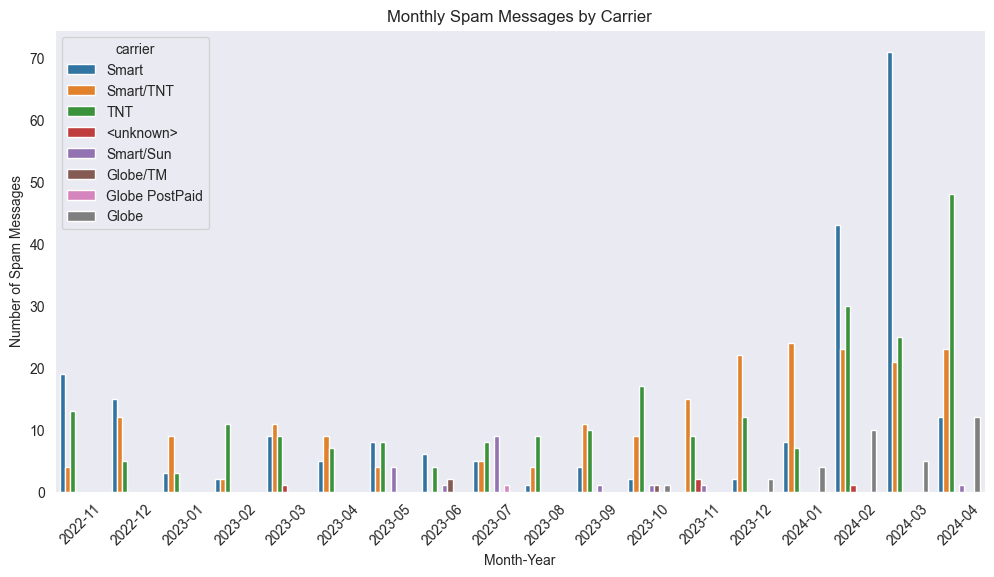

In [106]:
import seaborn as sns

#sns.relplot(x='date', y='carrier', data=df, 
#            height=3.8, aspect=1.8, kind='scatter')
#sns.barplot(x='month-year', y='carrier', data=df)
#sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.barplot(x='month-year', y='spam_count', hue='carrier', data=monthly_data)
sns.set_style('dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Number of Spam Messages')
plt.title('Monthly Spam Messages by Carrier')
plt.show()

## Preprocessing

In order to be able to properly segregrate the data, as dealing with the text messages individually made it give us holes in the data points. In order to remedy this, the group chose to preprocess the data points by grouping them into either weeks or months. We essentially played around with the data In the end, grouping the data by weeks was chosen as grouping by months would possibly give fewer data points to work with.By choosing to group the data by weeks, We were able to not only guarantee that there's data for each point in time (atleast 1 spam per week) but also detailed enough that we have enough data to work into the Linear Regression essentially the best of both worlds.  

Note by playing around with we found some interesting data such as what the carriers were most affected by spam messages as seen in the above graph.

In [107]:
df['date'] = pd.to_datetime(df['date'])


df['month-year'] = df['date'].dt.to_period('M')

monthly_data = df.groupby(['month-year']).size().reset_index(name='spam_count')

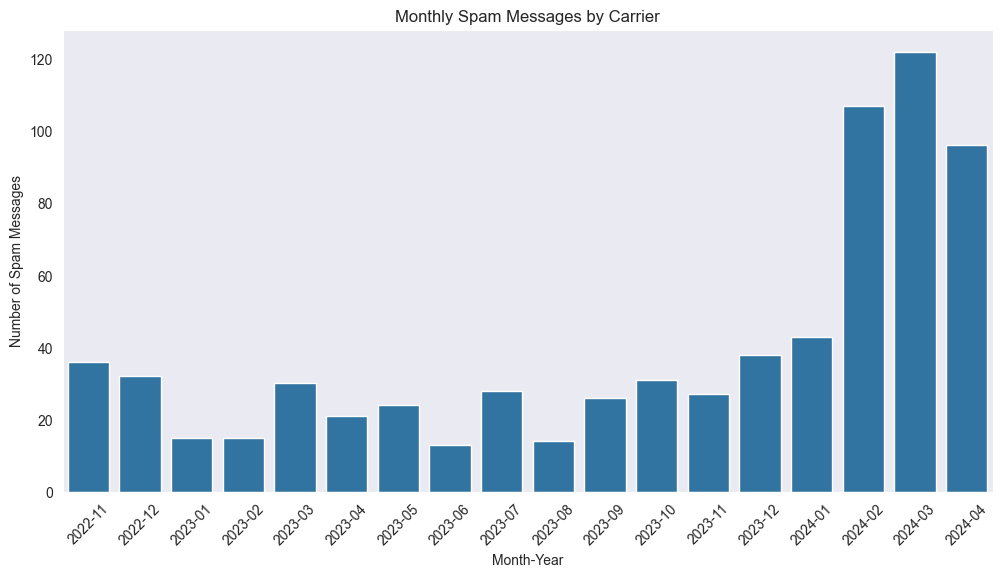

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month-year', y='spam_count', data=monthly_data)
sns.set_style('dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Number of Spam Messages')
plt.title('Monthly Spam Messages by Carrier')
plt.show()

SIM Registration Act:

Enacted:            September 27, 2022
Signed:             October 10, 2022
Commenced:          December 27, 2022
Deadline Extension: April 23, 2023
Final Deadline:     July 26, 2023
Grace Period End:   July 30, 2023
Monkey Moments:     September 5, 2023

## Making of new columns

As part of the preprocessing, the code made use of a new column which analyzed the spreadsheet and proceeded the text messages to their corresponding week number as well as the overall spam text message count for that corresponding week. These attributes were used in order to make graphing easier and were able to be used in the linear regression calculation and training.

In [109]:
#df['date'] = pd.to_datetime(df['date'])

df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
df['week'] = df['date'].dt.to_period('W-MON')
weekly_data = df.groupby(['week']).size().reset_index(name='spam_count')

#df = df.groupby(['date', pd.Grouper(key='date', freq='W-MON')]).size().reset_index().sort_values('date')
#df['day-month-year'] = df['date'].dt.to_period('D')
#daily_data = df.groupby(['day-month-year']).size().reset_index(name='spam_count')

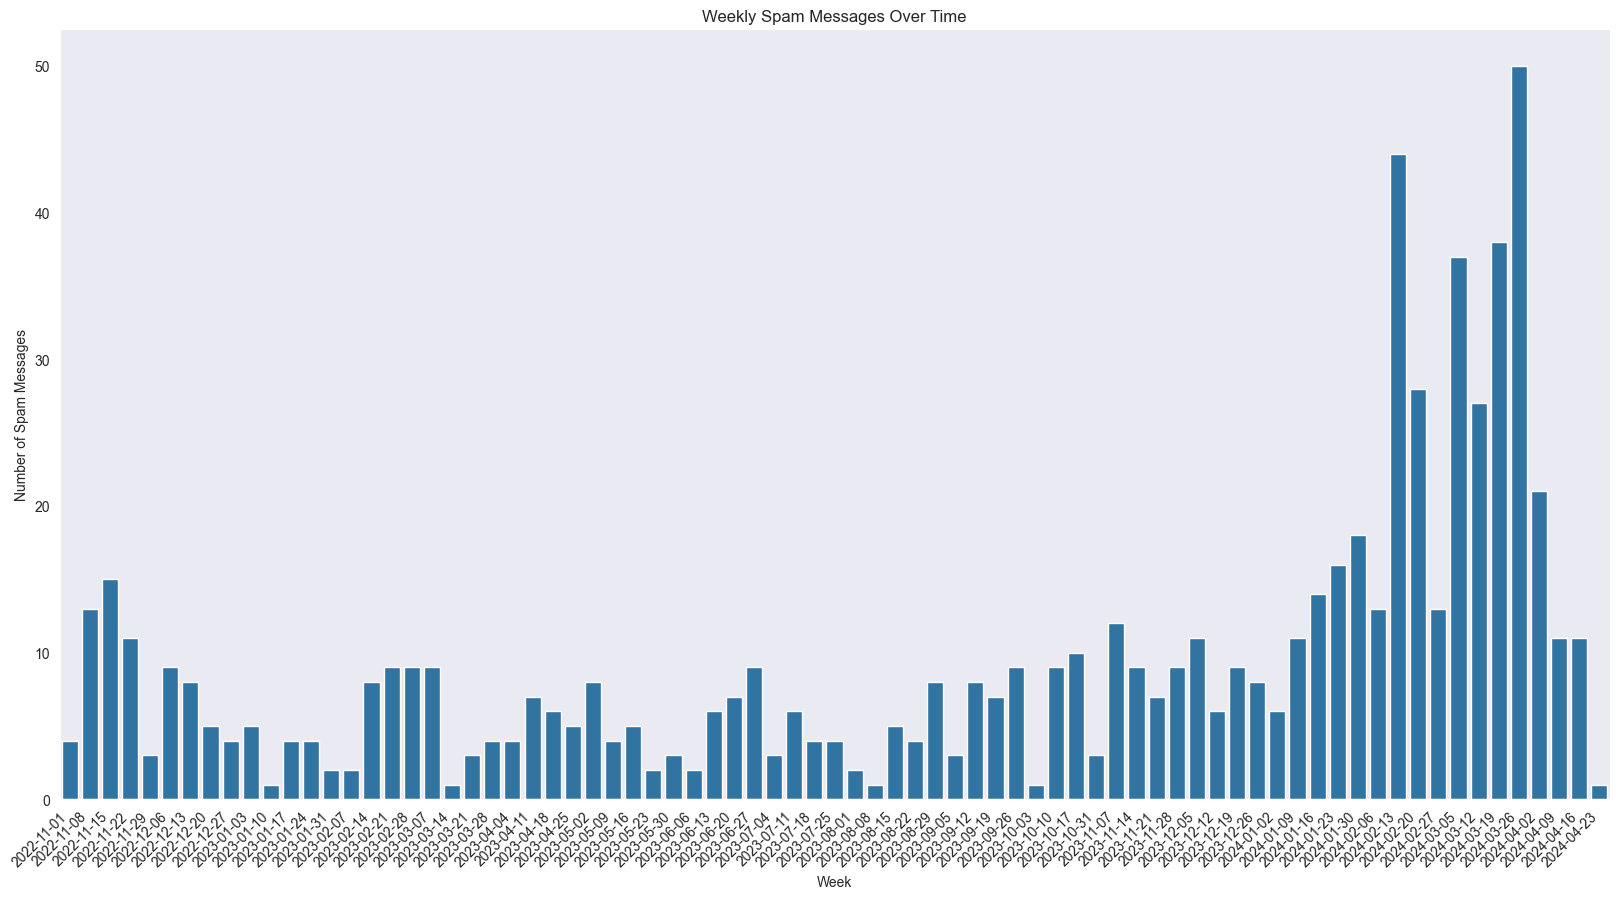

In [110]:
weekly_data['week'] = weekly_data['week'].dt.start_time

# Plot the data using Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='week', y='spam_count', data=weekly_data)
sns.set_style('dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Number of Spam Messages')
plt.title('Weekly Spam Messages Over Time')
plt.show()

In [111]:
weekly_data.columns

Index(['week', 'spam_count'], dtype='object')

## Linear Regression Section
The main coding of the linear regression mainly made use of the provided linear regression jupyter notebook already provided to us by Sir Raquel and followed the proper steps accordingly. The following code blocks are mostly based of the provided code blocks seen in the linear regression exercise.

In [112]:
weekly_data['week_number'] = (weekly_data['week'] - weekly_data['week'].min()).dt.days // 7
weekly_data['week_number']

0      0
1      1
2      2
3      3
4      4
      ..
72    73
73    74
74    75
75    76
76    77
Name: week_number, Length: 77, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

data = pd.DataFrame()
x = weekly_data[['week_number']]
y = weekly_data['spam_count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53, 1)
(24, 1)
(53,)
(24,)


In [114]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

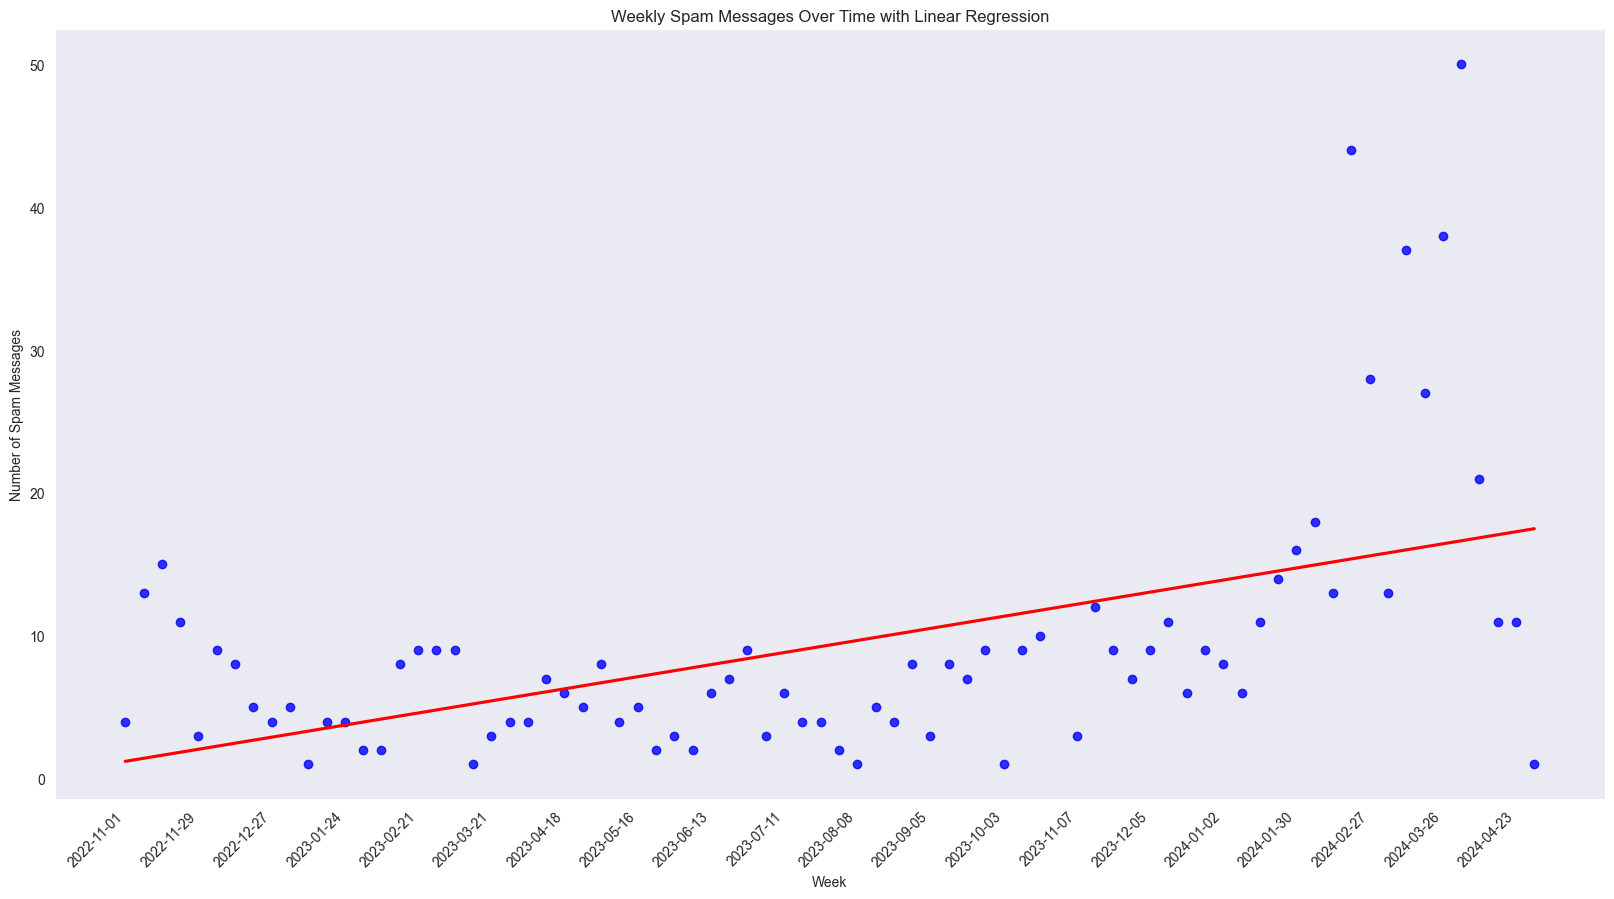

In [115]:
# Plot the data using Seaborn's regplot
plt.figure(figsize=(20, 10))
sns.set_style('dark')

# Using regplot to plot actual data points and the regression line
sns.regplot(x='week_number', y='spam_count', data=weekly_data, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Customize the plot
plt.xticks(ticks=np.arange(0, len(weekly_data), 4), labels=weekly_data['week'].dt.strftime('%Y-%m-%d').iloc[::4], rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Number of Spam Messages')
plt.title('Weekly Spam Messages Over Time with Linear Regression')

plt.show()

In [116]:
y_pred = regressor.predict(x_test)
y_pred

array([ 8.31782565, 11.40430199,  7.03179385, 19.63490554, 15.51960376,
       15.77681012, 16.29122285, 13.71915924,  9.60385746, 15.2623974 ,
        2.91649207, 14.23357196,  9.08944474,  0.85884118, 18.86328646,
        7.28900021, 12.17592107,  4.20252387, 11.91871471,  5.23134932,
       20.14931826, 18.6060801 , 16.80563557, 19.8921119 ])

In [117]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
31,2,8.317826
43,8,11.404302
26,8,7.031794
74,11,19.634906
58,9,15.519604
59,8,15.776810
61,11,16.291223
51,3,13.719159
36,6,9.603857
57,6,15.262397


In [118]:
residuals = y_test - y_pred
residuals

31    -6.317826
43    -3.404302
26     0.968206
74    -8.634906
58    -6.519604
59    -7.776810
61    -5.291223
51   -10.719159
36    -3.603857
57    -9.262397
10    -1.916492
53    -5.233572
34    -0.089445
2     14.141159
71    19.136714
27    -3.289000
46    -5.175921
15     3.797476
45    -3.918715
19    -4.231349
76   -19.149318
70     8.393920
63    -0.805636
75    -8.892112
Name: spam_count, dtype: float64

In [119]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 6.69454659825373


In [120]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 69.62849811918518


In [121]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 8.34436924633523


In [122]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.05367456366157852


## Results and Discussion

After the linear regression, the outputs were tested based on the linear regression models. All of the outputs proved to be pretty consistent when compared to the Linear Regression jupyter notebook with the exception of the R2 Score which gave us a negative number. This suggests that the model was not able to properly fit the data points. 

In order to deal with this, we split the linear regression into 3 parts, before the initial implementation, during the implementation and after the deadline for the SIM Registration act. The resulting metrics for each linear regression show that the regression performs well on all metrics besides the R2 score, which had bad to mediocre performance.

Based on these results, we can see that there was a decrease in spam messages following the announcement and start of implementation of the SIM registration act. This proved to be effective throughout the implementation period as well, showing an overall lower weekly spam message count. However, this trend did not continue beyond the deadline for SIM registration. Past the registration period the number of spam messages began to rise, possibly due to people realizing how easy it is to get a SIM card registered. On September 6, 2023 the NBI Cybercrime Division's findings went public on how a monkey photo was able to pass the SIM card registration. While this news going public had no direct effect on the rising amount of spam messages, it was a symptom of how easy it is to bypass the registration. 

While the concept of registering SIM cards in order to increase the barrier of entry to scamming people is not bad in theory. But due to the mediocre implementation and the resulting emboldening in participating in scams, the SIM registration only had an initial scare factor in discouraging scammers and ended up mainly as a short term solution.

Metrics for Before period:
  Mean Absolute Error (MAE): 3.346938775510204
  Mean Squared Error (MSE): 16.53061224489796
  Root Mean Squared Error (RMSE): 4.06578556307363
  R-squared (R2): 0.01937046004842624

Metrics for During period:
  Mean Absolute Error (MAE): 1.9939933259176863
  Mean Squared Error (MSE): 5.853259176863182
  Root Mean Squared Error (RMSE): 2.4193509825701565
  R-squared (R2): 0.01735995911642174

Metrics for After period:
  Mean Absolute Error (MAE): 6.104054969515145
  Mean Squared Error (MSE): 72.38676880395644
  Root Mean Squared Error (RMSE): 8.50804141997184
  R-squared (R2): 0.4691455465674499



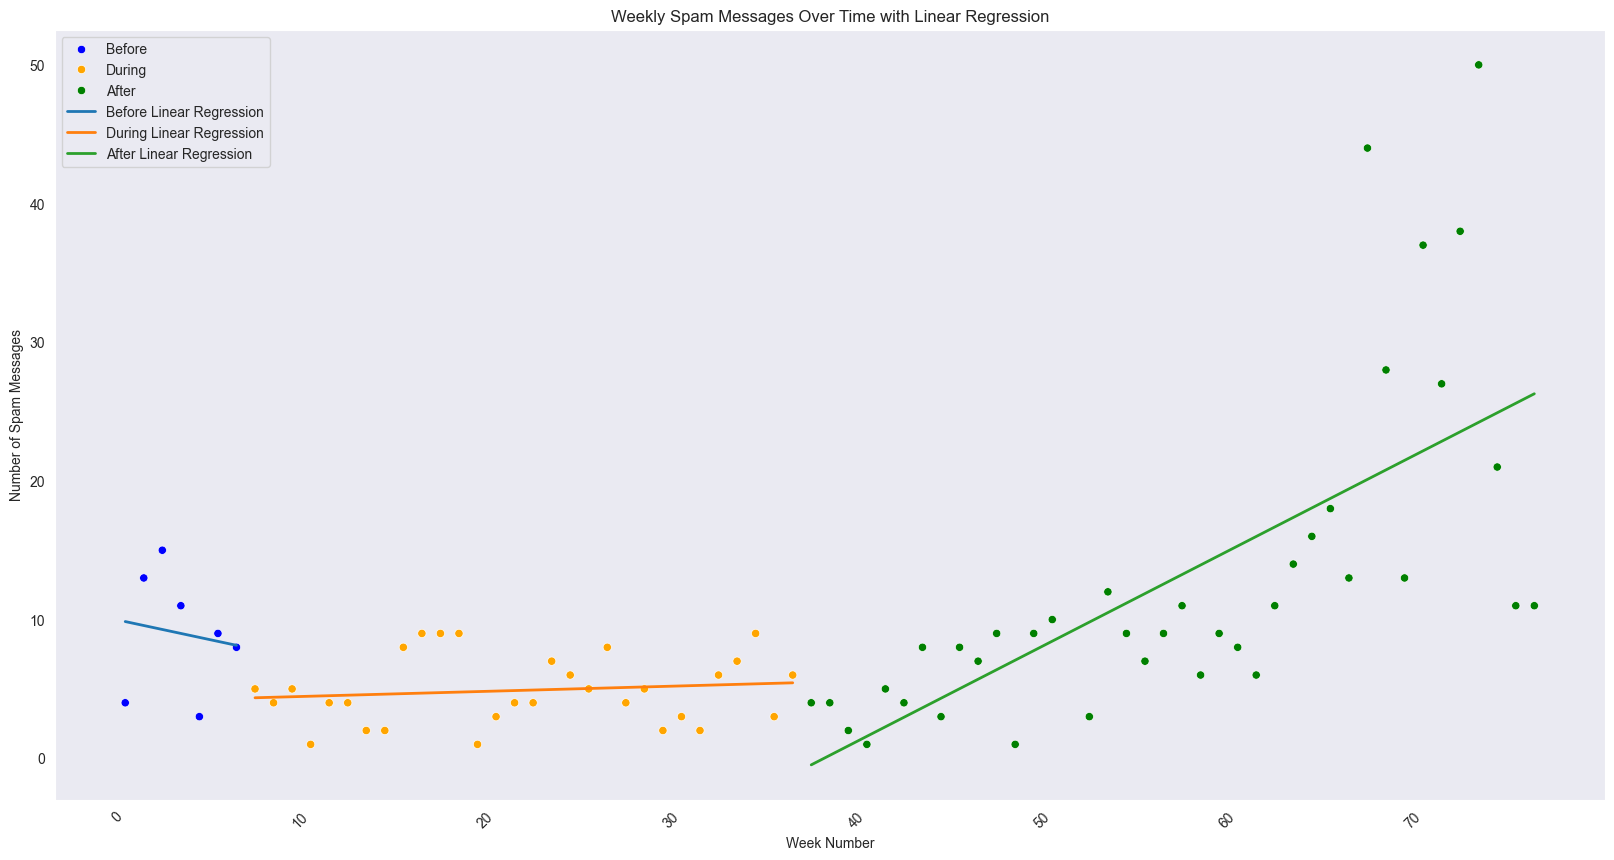

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
path = 'SPAM_SMS.csv'
df = pd.read_csv(path)

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by week, starting on Monday
df['week'] = df['date'].dt.to_period('W-MON')

# Count the number of spam messages per week
weekly_data = df.groupby(['week']).size().reset_index(name='spam_count')

# Convert 'week' back to datetime for plotting
weekly_data['week'] = weekly_data['week'].dt.start_time

# Define the periods
sim_start = pd.to_datetime('2022-12-27')
sim_end = pd.to_datetime('2023-07-25')

# Create period labels
weekly_data['period'] = pd.cut(weekly_data['week'],
                               bins=[weekly_data['week'].min(), sim_start, sim_end, weekly_data['week'].max()],
                               labels=['Before', 'During', 'After'],
                               right=False)

# Drop rows with NaN in 'period' column
weekly_data = weekly_data.dropna(subset=['period'])

# Prepare data for linear regression
weekly_data['week_number'] = (weekly_data['week'] - weekly_data['week'].min()).dt.days // 7

# Initialize dictionaries to store models, predictions, and metrics
models = {}
predictions = {}
metrics = {}

# Fit a linear regression model for each period
for period in weekly_data['period'].unique():
    period_data = weekly_data[weekly_data['period'] == period]
    X = period_data[['week_number']]
    y = period_data['spam_count']
    
    model = LinearRegression()
    model.fit(X, y)
    
    models[period] = model
    predictions[period] = model.predict(X)
    
    # Store the predictions in the dataframe
    weekly_data.loc[weekly_data['period'] == period, 'predicted_spam_count'] = predictions[period]
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y, predictions[period])
    mse = mean_squared_error(y, predictions[period])
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions[period])
    metrics[period] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print the evaluation metrics for each period
for period in metrics.keys():
    print(f"Metrics for {period} period:")
    print(f"  Mean Absolute Error (MAE): {metrics[period]['MAE']}")
    print(f"  Mean Squared Error (MSE): {metrics[period]['MSE']}")
    print(f"  Root Mean Squared Error (RMSE): {metrics[period]['RMSE']}")
    print(f"  R-squared (R2): {metrics[period]['R2']}")
    print()

# Plot the data using Seaborn's scatterplot and Matplotlib's plot
plt.figure(figsize=(20, 10))

# Plot the actual data
sns.scatterplot(x='week_number', y='spam_count', hue='period', data=weekly_data, palette={'Before': 'blue', 'During': 'orange', 'After': 'green'})

# Plot the regression lines
for period in models.keys():
    period_data = weekly_data[weekly_data['period'] == period]
    plt.plot(period_data['week_number'], period_data['predicted_spam_count'], label=f'{period} Linear Regression', linewidth=2)

sns.set_style('dark')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Week Number')
plt.ylabel('Number of Spam Messages')
plt.title('Weekly Spam Messages Over Time with Linear Regression')
plt.legend()
plt.show()
